In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('netflix.csv', sep = ',', header = 0)
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [28]:
drop_col = data.columns[data.isnull().sum()/len(data) > 0.15].tolist()

In [29]:
data.drop(drop_col, axis = 1, inplace = True)

In [30]:
data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)

In [31]:
def one_hot_encoding(data:pd.DataFrame, col:str)->pd.DataFrame:
    '''This function will apply one hot encoding for a given dataframe and column name'''
    data.reset_index(drop = True, inplace = True)
    data_list = data[col].apply(lambda x: x.split(','))
    data_list =data_list.apply(lambda x: [i.strip() for i in x])
    data_list_unique = []
    print(data_list.values)
    for lst in data_list:
        for val in lst:
            if val not in data_list_unique:
                data_list_unique.append(val)
    data_mat = np.zeros((len(data_list), len(data_list_unique)))
    data_mat_df = pd.DataFrame(data_mat, columns=data_list_unique)
    for idx, cons in enumerate(data_list.values):
        for con in cons:
            data_mat_df.loc[idx, con] = 1
    print(data_mat_df)
    data.drop(col, axis = 1, inplace = True)
    
    try:
        assert len(data) == len(data_mat_df)
        con_data = pd.concat([data, data_mat_df], axis = 1, join = 'outer')
        return con_data, data_mat_df.columns
    except AssertionError:
        print('Concatenation of two dataframes could not happen')

In [32]:
con_data, con_cols = one_hot_encoding(data, 'country')

[list(['South Africa']) list(['India'])
 list(['United States', 'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia'])
 ... list(['United States']) list(['United States']) list(['India'])]
      South Africa  India  United States  Ghana  Burkina Faso  United Kingdom  \
0              1.0    0.0            0.0    0.0           0.0             0.0   
1              0.0    1.0            0.0    0.0           0.0             0.0   
2              0.0    0.0            1.0    1.0           1.0             1.0   
3              0.0    0.0            0.0    0.0           0.0             1.0   
4              0.0    0.0            1.0    0.0           0.0             0.0   
...            ...    ...            ...    ...           ...             ...   
7285           0.0    0.0            0.0    0.0           0.0             0.0   
7286           0.0    0.0            1.0    0.0           0.0             0.0   
7287           0.0    0.0            1.0    0.0           0.0         

In [33]:
print(con_data.shape)
print(con_cols)

(7290, 126)
Index(['South Africa', 'India', 'United States', 'Ghana', 'Burkina Faso',
       'United Kingdom', 'Germany', 'Ethiopia', 'Czech Republic', 'Mexico',
       ...
       'Vatican City', 'Ukraine', 'Jamaica', 'Lithuania', 'Afghanistan',
       'Somalia', 'Sudan', 'Panama', 'East Germany', 'Montenegro'],
      dtype='object', length=116)


In [34]:
listed_in_data, listed_in_cols = one_hot_encoding(data,'listed_in')

[list(['International TV Shows', 'TV Dramas', 'TV Mysteries'])
 list(['International TV Shows', 'Romantic TV Shows', 'TV Comedies'])
 list(['Dramas', 'Independent Movies', 'International Movies']) ...
 list(['Comedies', 'Horror Movies'])
 list(['Children & Family Movies', 'Comedies'])
 list(['Dramas', 'International Movies', 'Music & Musicals'])]
      International TV Shows  TV Dramas  TV Mysteries  Romantic TV Shows  \
0                        1.0        1.0           1.0                0.0   
1                        1.0        0.0           0.0                1.0   
2                        0.0        0.0           0.0                0.0   
3                        0.0        0.0           0.0                0.0   
4                        0.0        0.0           0.0                0.0   
...                      ...        ...           ...                ...   
7285                     0.0        0.0           0.0                0.0   
7286                     0.0        0.0    

In [35]:
listed_in_data.shape

(7290, 51)

In [36]:
# which country has maximum number movies released

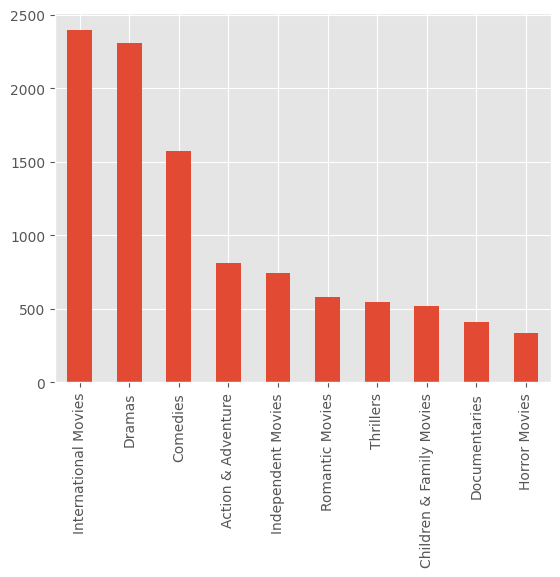

In [37]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use('ggplot')
listed_in_data.loc[listed_in_data.type == 'Movie', listed_in_cols].sum().sort_values(ascending = False)[:10].plot(kind = 'bar');

In [38]:
year = listed_in_data.loc[listed_in_data.type == 'TV Show', 'release_year'].value_counts().index[0]

In [39]:
listed_in_data.loc[listed_in_data.release_year == year, 'type'].value_counts()

type
Movie      417
TV Show    327
Name: count, dtype: int64

In [40]:
seasons = listed_in_data.loc[(listed_in_data.release_year == year) & (listed_in_data.type == 'TV Show'), 'duration'].value_counts()

In [41]:
print(seasons.index)

Index(['1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons',
       '6 Seasons', '7 Seasons', '8 Seasons', '17 Seasons', '9 Seasons'],
      dtype='object', name='duration')


In [42]:
seasons_int_list = sorted([int(i.strip()[:2]) for i in seasons.index])
print(seasons_int_list)
seasons_max = seasons_int_list[-1]
seasons_min = seasons_int_list[0]
print(seasons_max, seasons_min)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 17]
17 1


In [43]:
seasons_df.loc[seasons_df.duration == str(seasons_max) + 'seasons', 'title']

NameError: name 'seasons_df' is not defined